# STD & me

Analysis of 2014 data from the CDC on the prevalence of STD's in U.S. counties. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

## CDC data on Syphilis

In [3]:
df = pd.read_csv("../data/cdc/syphilis.csv")

In [4]:
df.shape

(3228, 12)

In [5]:
df.columns

Index(['Disease', 'Area', 'State Abbreviation', 'FIPS', 'Year', 'Race', 'Sex', 'Age group', 'Transmission Category', 'Population', 'Cases', 'Rate'], dtype='object')

In [6]:
df.dtypes

Disease                  object
Area                     object
State Abbreviation       object
FIPS                      int64
Year                      int64
Race                     object
Sex                      object
Age group                object
Transmission Category    object
Population               object
Cases                    object
Rate                     object
dtype: object

In [7]:
df_test = df.convert_objects(convert_numeric=True)
df_test.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [8]:
df_test.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Primary and Secondary Syphilis,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,0,0.0
1,Primary and Secondary Syphilis,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,5,2.6
2,Primary and Secondary Syphilis,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,1,3.7
3,Primary and Secondary Syphilis,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,0,0.0
4,Primary and Secondary Syphilis,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,0,0.0


In [9]:
df['Population'] = df['Population'].str.replace(',','')
df['Cases'] = df['Cases'].str.replace(',','')

In [10]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [11]:
df.head(77)

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Primary and Secondary Syphilis,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,55246,0,0.0
1,Primary and Secondary Syphilis,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,195540,5,2.6
2,Primary and Secondary Syphilis,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,27076,1,3.7
3,Primary and Secondary Syphilis,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22512,0,0.0
4,Primary and Secondary Syphilis,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,57872,0,0.0
5,Primary and Secondary Syphilis,Bullock County,AL,1011,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,10639,1,9.4
6,Primary and Secondary Syphilis,Butler County,AL,1013,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,20265,1,4.9
7,Primary and Secondary Syphilis,Calhoun County,AL,1015,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,116736,2,1.7
8,Primary and Secondary Syphilis,Chambers County,AL,1017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34162,0,0.0
9,Primary and Secondary Syphilis,Cherokee County,AL,1019,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,26203,0,0.0


In [12]:
df['Population'].describe()

count        3220.000000
mean        99360.995963
std        318648.364529
min            90.000000
25%         11267.750000
50%         26165.500000
75%         66834.250000
max      10017068.000000
Name: Population, dtype: float64

In [13]:
df['Population'].idxmax()

207

In [14]:
df.loc[207]

Disease                  Primary and Secondary Syphilis
Area                                 Los Angeles County
State Abbreviation                                   CA
FIPS                                               6037
Year                                               2014
Race                              All races/ethnicities
Sex                                          Both sexes
Age group                                All age groups
Transmission Category       All transmission categories
Population                                  1.00171e+07
Cases                                              1204
Rate                                                 12
Name: 207, dtype: object

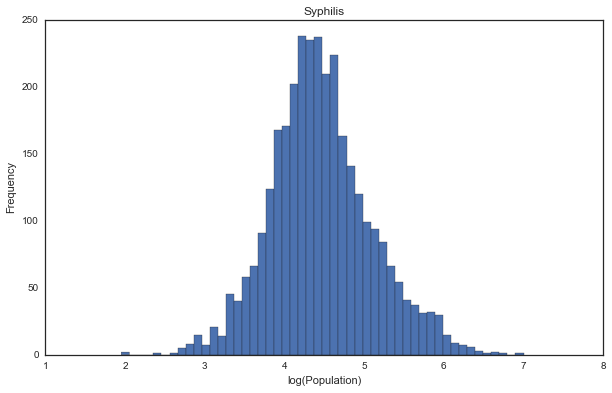

In [15]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Population'])
ax = data.plot.hist(50)
ax.set_xlabel("log(Population)")
ax.set_title("Syphilis")
plt.savefig('../graphics/county_population_syphilis.png', bbox_inches='tight', dpi=150)

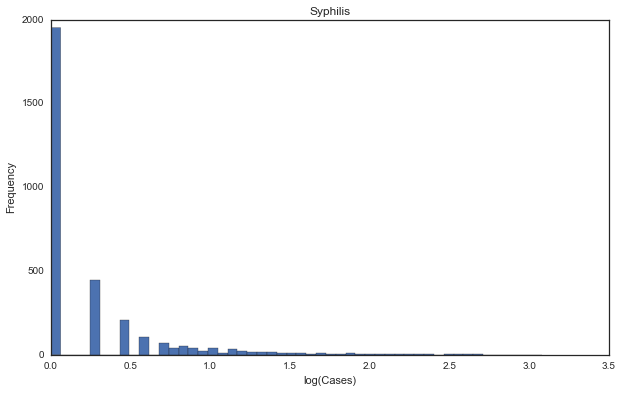

In [16]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Cases']+1)
ax = data.plot.hist(50)
ax.set_xlabel("log(Cases)")
ax.set_title("Syphilis")
plt.savefig('../graphics/county_cases_syphilis.png', bbox_inches='tight', dpi=150)

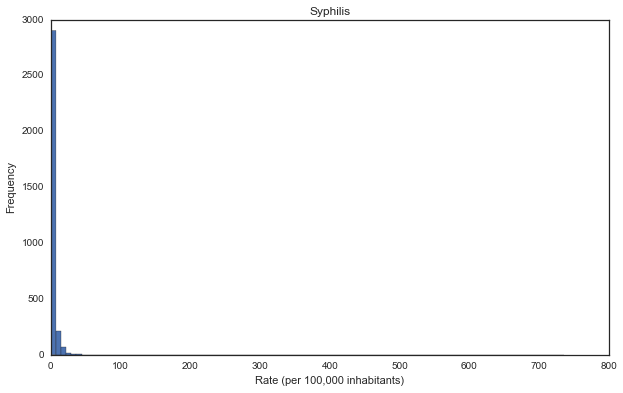

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = df['Rate'].plot.hist(100)
ax.set_xlabel("Rate (per 100,000 inhabitants)")
ax.set_title("Syphilis")
plt.savefig('../graphics/county_rate_syphilis.png', bbox_inches='tight', dpi=150)

In [18]:
outliers = df[df['Rate']<10]

In [19]:
outliers

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Primary and Secondary Syphilis,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,55246,0,0.0
1,Primary and Secondary Syphilis,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,195540,5,2.6
2,Primary and Secondary Syphilis,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,27076,1,3.7
3,Primary and Secondary Syphilis,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22512,0,0.0
4,Primary and Secondary Syphilis,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,57872,0,0.0
5,Primary and Secondary Syphilis,Bullock County,AL,1011,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,10639,1,9.4
6,Primary and Secondary Syphilis,Butler County,AL,1013,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,20265,1,4.9
7,Primary and Secondary Syphilis,Calhoun County,AL,1015,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,116736,2,1.7
8,Primary and Secondary Syphilis,Chambers County,AL,1017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34162,0,0.0
9,Primary and Secondary Syphilis,Cherokee County,AL,1019,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,26203,0,0.0


In [20]:
not_exclude_list = df["Cases"]<0
exclude_list = [not i for i in not_exclude_list]
df_sig = df[exclude_list].copy()

In [21]:
df = df_sig.copy()

In [22]:
df["Rate"].sort_values()

0         0.0
1802      0.0
1804      0.0
1807      0.0
1808      0.0
1809      0.0
1810      0.0
1812      0.0
1813      0.0
1816      0.0
1817      0.0
1818      0.0
1819      0.0
1826      0.0
1827      0.0
1829      0.0
1800      0.0
1832      0.0
1799      0.0
1770      0.0
1749      0.0
1752      0.0
1753      0.0
1754      0.0
1755      0.0
1756      0.0
1757      0.0
1758      0.0
1760      0.0
1762      0.0
        ...  
1600     25.8
1421     26.0
1124     28.6
2529     28.7
436      30.1
420      30.3
1861     30.6
1219     30.9
3213     31.5
3223     32.9
433      33.9
3157     36.1
1151     39.1
507      42.2
449      43.6
1156     45.0
226      56.1
926      77.5
2428     90.5
2384    125.3
2035    203.2
2379    735.5
76        NaN
86        NaN
87        NaN
90        NaN
95        NaN
2919      NaN
3146      NaN
3148      NaN
Name: Rate, dtype: float64

In [23]:
len(df['Area'].unique())

1962

In [24]:
df.shape

(3228, 12)

In [25]:
df.sort_values(by='Area')

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
2319,Primary and Secondary Syphilis,Abbeville County,SC,45001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25007,0,0.0
1116,Primary and Secondary Syphilis,Acadia Parish,LA,22001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,62204,2,3.2
2823,Primary and Secondary Syphilis,Accomack County,VA,51001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,33148,1,3.0
554,Primary and Secondary Syphilis,Ada County,ID,16001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,416464,4,1.0
996,Primary and Secondary Syphilis,Adair County,KY,21001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,18732,0,0.0
1486,Primary and Secondary Syphilis,Adair County,MO,29001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25572,1,3.9
792,Primary and Secondary Syphilis,Adair County,IA,19001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,7472,0,0.0
2134,Primary and Secondary Syphilis,Adair County,OK,40001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22194,0,0.0
1657,Primary and Secondary Syphilis,Adams County,NE,31001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,31610,0,0.0
700,Primary and Secondary Syphilis,Adams County,IN,18001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34614,0,0.0


In [26]:
df['Area'].value_counts()

Washington County          30
Jefferson County           25
Franklin County            24
Lincoln County             23
Jackson County             23
Madison County             19
Clay County                18
Montgomery County          18
Union County               17
Monroe County              17
Marion County              17
Wayne County               16
Greene County              14
Warren County              14
Grant County               14
Carroll County             13
Polk County                12
Lake County                12
Johnson County             12
Clark County               12
Adams County               12
Lee County                 12
Douglas County             12
Marshall County            12
Crawford County            11
Scott County               11
Lawrence County            11
Calhoun County             11
Fayette County             11
Morgan County              11
                           ..
Itasca County               1
Red Willow County           1
LoÕza Muni

In [27]:
df.isnull().values.any()

True

In [28]:
null_list = df["Population"].isnull()
not_null_list = [not i for i in null_list]
df_clean = df[not_null_list].copy()

In [29]:
null_list = df_clean["Rate"].isnull()
not_null_list = [not i for i in null_list]
df_completely_clean = df_clean[not_null_list].copy()

In [30]:
df_completely_clean["Rate"].isnull().values.any()

False

## Model the Syphilis rate

In [31]:
df_merged = pd.read_csv("../data/chlamydia_cdc_census.csv")

In [32]:
df_completely_clean[df_completely_clean["FIPS"]==1001].Cases[0]

0.0

Replace the number of Chlamydia cases with the number of Syphilis cases

In [33]:
#print(df_merged[df_merged["FIPS"]==1001].Cases[0])
#df_merged.set_value(1, "FIPS", 10)
for county in df_merged["FIPS"]:
    rowlist = df_merged[df_merged['FIPS'] == county].index.tolist()
    syphilis_cases = df_completely_clean[df_completely_clean["FIPS"] == county].Cases.tolist()
    df_merged.set_value(rowlist[0], 'Cases', syphilis_cases[0])
#    print(df_merged["FIPS"][rowlist[0]])
    #df_merged[df_merged["FIPS"]==county]

In [34]:
df_merged.head()

,FIPS,Population,Cases,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
0,1001,55246,0,4.736962,21.8,7.9,5.6,5.8,6.1,7.6,7.5,15.0,10.7,12.0,37.0,48.7,51.3,78.5,17.7,0.4,0.9,0.1,1.6,2.4,99.2,37.1,20.8,31.8,23.6,6.1,0.8,74.5,34.9,56.2,25.3,25.5,2.68,3.13,75.4,24.6,52475,0.562138,0.003017,0.020029,0.002868,0.017704,92.781808
1,1003,195540,5,5.260703,19.0,6.4,5.2,5.6,5.9,6.3,6.6,14.8,13.5,16.9,41.1,48.9,51.1,85.7,9.4,0.7,0.7,0.0,1.5,4.4,98.7,40.2,21.9,26.8,20.1,5.6,1.3,69.9,28.0,54.5,19.9,30.1,2.46,2.93,72.5,27.5,50183,0.545409,0.002747,0.023886,0.003444,0.020292,122.920831
2,1005,27076,1,4.438653,18.0,6.3,6.5,7.3,6.6,6.6,6.6,14.7,13.2,14.3,39.0,53.1,46.9,48.0,46.9,0.4,0.4,0.1,0.9,5.1,88.4,35.8,15.6,25.7,17.7,7.8,11.6,68.4,27.4,43.7,14.4,31.6,2.47,3.01,66.8,33.2,35634,0.437169,0.002342,0.019348,0.003666,0.022200,30.563959
3,1007,22512,0,4.360120,18.4,6.7,6.5,7.0,7.2,7.6,7.1,14.8,11.9,12.6,37.8,53.7,46.3,75.8,22.0,0.3,0.1,0.1,0.9,1.8,90.3,34.7,18.2,26.8,18.7,7.5,9.7,72.3,29.5,52.5,20.1,27.7,2.60,3.09,75.6,24.4,37984,0.524582,0.001886,0.020244,0.002012,0.020370,36.101222
4,1009,57872,0,4.758321,20.2,7.0,5.4,6.0,6.0,6.8,7.0,14.1,12.6,14.6,39.0,49.5,50.5,92.6,1.3,0.5,0.2,0.1,1.2,8.1,99.1,37.6,22.8,29.2,21.3,6.4,0.9,75.0,31.1,60.6,24.1,25.0,2.63,3.07,80.6,19.4,44409,0.606034,0.001946,0.017981,0.003707,0.013440,89.615659


In [35]:
df_merged.describe()

,FIPS,Population,Cases,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
count,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,30492.802614,100423.684967,5.974510,4.460522,19.163007,6.908072,5.977222,5.819314,5.695294,5.899739,6.297484,15.002190,13.250327,15.985556,40.491667,50.003856,49.996144,84.076340,8.121307,1.550719,1.165033,0.082418,1.966765,8.417353,96.604379,39.254118,20.403791,27.047647,20.409281,5.134248,3.395654,67.828627,27.814542,52.057712,19.173268,32.171438,2.476042,2.988451,72.576307,27.423791,46800.265359,0.520577,0.002492,0.030613,0.003221,0.024522,239.640924
std,15071.256920,323873.098080,38.680805,0.634640,2.846254,1.135197,2.546279,1.223101,0.950620,0.878120,0.830619,1.506377,2.129781,4.166765,4.959052,2.204346,2.204346,15.045667,13.038226,5.071524,2.533382,0.967483,1.549707,13.303866,4.451890,3.484761,2.711350,3.484574,3.001770,2.163983,4.451875,4.990887,4.766401,5.948292,4.289568,4.990872,0.203247,0.181387,7.350396,7.350283,12025.134705,0.059487,0.001291,0.007625,0.001295,0.007228,1610.657866
min,1001.000000,90.000000,0.000000,1.913814,0.000000,0.000000,1.300000,2.300000,2.400000,1.200000,2.800000,6.300000,4.000000,3.500000,22.600000,43.200000,27.900000,14.200000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,45.000000,17.600000,7.500000,4.400000,0.000000,0.700000,0.000000,18.800000,0.000000,11.600000,0.000000,13.400000,1.260000,2.000000,1.400000,10.200000,19146.000000,0.115942,0.000000,0.000000,0.000000,0.000000,0.069674
25%,19006.500000,11208.000000,0.000000,4.051722,17.400000,6.300000,4.700000,5.100000,5.100000,5.400000,5.800000,14.200000,12.000000,13.300000,37.700000,48.900000,49.600000,76.575000,0.500000,0.200000,0.300000,0.000000,1.100000,1.600000,96.300000,37.400000,18.800000,25.000000,18.600000,3.500000,1.100000,65.200000,25.000000,48.800000,16.500000,29.300000,2.350000,2.880000,69.200000,22.600000,38810.000000,0.488003,0.001797,0.025435,0.002469,0.020005,17.078483
50%,29188.000000,25987.000000,0.000000,4.414815,19.100000,6.800000,5.500000,5.600000,5.600000,5.900000,6.300000,15.100000,13.100000,15.700000,40.500000,49.500000,50.500000,89.450000,1.900000,0.400000,0.500000,0.000000,1.600000,3.300000,98.200000,39.500000,20.700000,27.100000,20.400000,4.900000,1.800000,68.100000,27.450000,52.500000,18.700000,31.900000,2.450000,2.970000,73.800000,26.200000,45009.500000,0.524803,0.002367,0.030222,0.003160,0.024365,45.094109
75%,45085.500000,67582.250000,1.000000,4.825413,20.700000,7.300000,6.500000,6.400000,6.200000,6.400000,6.800000,15.800000,14.300000,18.300000,43.400000,50.400000,51.100000,95.625000,9.400000,0.800000,1.000000,0.100000,2.300000,8.400000,98.900000,41.300000,22.225000,29.000000,22.000000,6.500000,3.700000,70.700000,30.100000,55.700000,21.000000,34.800000,2.570000,3.070000,77.400000,30.800000,52013.500000,0.556712,0.002993,0.035313,0.003841,0.028793,114.277352
max,56045.000000,10017068.000000,1204.000000,6.992050,33.600000,18.300000,28.100000,16.100000,11.700000,9.700000,11.900000,24.500000,28.100000,43.400000,62.700000,72.100000,56.800000,99.200000,84.400000,75.500000,43.900000,48.900000,29.500000,95.700000,100.000000,76.700000,28.800000,42.800000

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


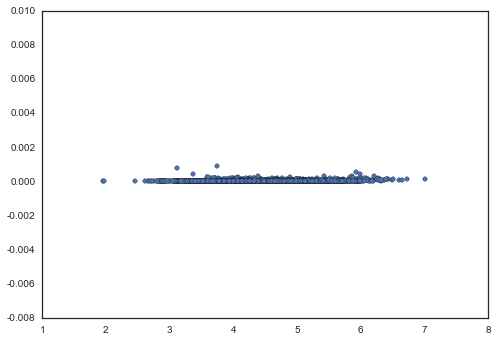

In [36]:
plt.scatter(np.log10(df_merged["Population"]), df_merged["Cases"]/df_merged["Population"])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


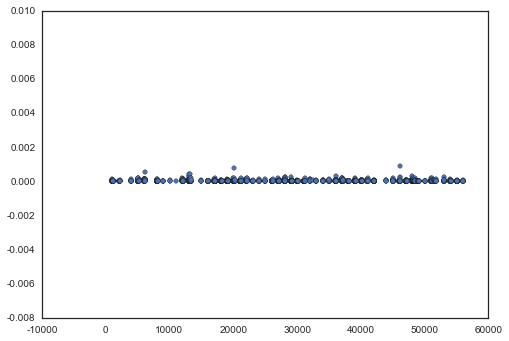

In [37]:
plt.scatter(df_merged["FIPS"], df_merged["Cases"]/df_merged["Population"])

### Plot the correlation matrix

In [38]:
df_all = df_merged.copy()
df_all["Rate"] = df_all["Cases"]/df_all["Population"]
corr = df_all.corr()

In [39]:
pearsonr = corr["Rate"]
pearsonr

FIPS         -0.064292
Population    0.273726
Cases         0.382305
hd01s001      0.285474
hd02s002      0.048731
hd02s005      0.064416
hd02s006      0.149570
hd02s007      0.267364
hd02s008      0.222519
hd02s009      0.158111
hd02s010      0.080689
hd02s011     -0.119198
hd02s013     -0.168108
hd02s015     -0.191640
hd01s020     -0.191561
hd02s026     -0.090894
hd02s051      0.090894
hd02s078     -0.363172
hd02s079      0.309328
hd02s080      0.015388
hd02s081      0.228630
hd02s089      0.008705
hd02s095      0.107606
hd02s107      0.098746
hd02s131     -0.008639
hd02s132     -0.098265
hd02s133     -0.306021
hd02s134      0.071272
hd02s135     -0.024376
hd02s136      0.264742
hd02s143      0.008635
hd02s151     -0.090377
hd02s152      0.069610
hd02s153     -0.281053
hd02s154     -0.051408
hd02s159      0.090372
hd01s167      0.106226
hd01s168      0.179042
hd02s181     -0.288209
hd02s184      0.288219
hd01vd01      0.043490
d002         -0.280971
d014          0.283016
d019       

In [40]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


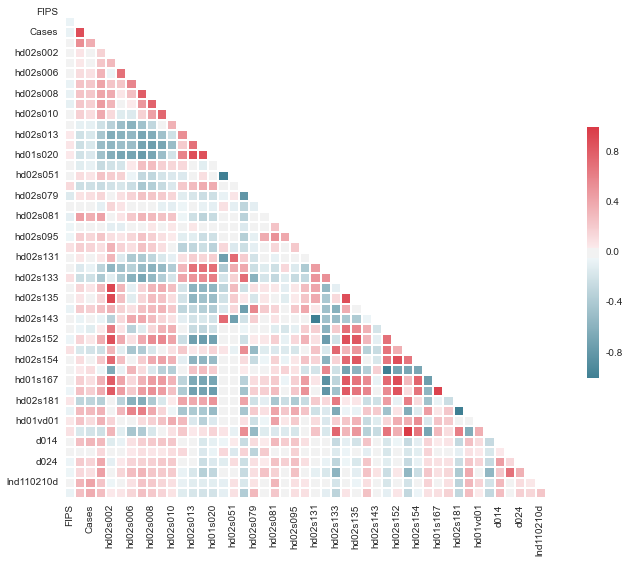

In [41]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.savefig('../graphics/cross-correlation_syphilis.png', bbox_inches='tight', dpi=150)

### Make principal component analysis

In [42]:
from sklearn.decomposition import PCA

In [43]:
df_merged.describe()

,FIPS,Population,Cases,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
count,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,30492.802614,100423.684967,5.974510,4.460522,19.163007,6.908072,5.977222,5.819314,5.695294,5.899739,6.297484,15.002190,13.250327,15.985556,40.491667,50.003856,49.996144,84.076340,8.121307,1.550719,1.165033,0.082418,1.966765,8.417353,96.604379,39.254118,20.403791,27.047647,20.409281,5.134248,3.395654,67.828627,27.814542,52.057712,19.173268,32.171438,2.476042,2.988451,72.576307,27.423791,46800.265359,0.520577,0.002492,0.030613,0.003221,0.024522,239.640924
std,15071.256920,323873.098080,38.680805,0.634640,2.846254,1.135197,2.546279,1.223101,0.950620,0.878120,0.830619,1.506377,2.129781,4.166765,4.959052,2.204346,2.204346,15.045667,13.038226,5.071524,2.533382,0.967483,1.549707,13.303866,4.451890,3.484761,2.711350,3.484574,3.001770,2.163983,4.451875,4.990887,4.766401,5.948292,4.289568,4.990872,0.203247,0.181387,7.350396,7.350283,12025.134705,0.059487,0.001291,0.007625,0.001295,0.007228,1610.657866
min,1001.000000,90.000000,0.000000,1.913814,0.000000,0.000000,1.300000,2.300000,2.400000,1.200000,2.800000,6.300000,4.000000,3.500000,22.600000,43.200000,27.900000,14.200000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,45.000000,17.600000,7.500000,4.400000,0.000000,0.700000,0.000000,18.800000,0.000000,11.600000,0.000000,13.400000,1.260000,2.000000,1.400000,10.200000,19146.000000,0.115942,0.000000,0.000000,0.000000,0.000000,0.069674
25%,19006.500000,11208.000000,0.000000,4.051722,17.400000,6.300000,4.700000,5.100000,5.100000,5.400000,5.800000,14.200000,12.000000,13.300000,37.700000,48.900000,49.600000,76.575000,0.500000,0.200000,0.300000,0.000000,1.100000,1.600000,96.300000,37.400000,18.800000,25.000000,18.600000,3.500000,1.100000,65.200000,25.000000,48.800000,16.500000,29.300000,2.350000,2.880000,69.200000,22.600000,38810.000000,0.488003,0.001797,0.025435,0.002469,0.020005,17.078483
50%,29188.000000,25987.000000,0.000000,4.414815,19.100000,6.800000,5.500000,5.600000,5.600000,5.900000,6.300000,15.100000,13.100000,15.700000,40.500000,49.500000,50.500000,89.450000,1.900000,0.400000,0.500000,0.000000,1.600000,3.300000,98.200000,39.500000,20.700000,27.100000,20.400000,4.900000,1.800000,68.100000,27.450000,52.500000,18.700000,31.900000,2.450000,2.970000,73.800000,26.200000,45009.500000,0.524803,0.002367,0.030222,0.003160,0.024365,45.094109
75%,45085.500000,67582.250000,1.000000,4.825413,20.700000,7.300000,6.500000,6.400000,6.200000,6.400000,6.800000,15.800000,14.300000,18.300000,43.400000,50.400000,51.100000,95.625000,9.400000,0.800000,1.000000,0.100000,2.300000,8.400000,98.900000,41.300000,22.225000,29.000000,22.000000,6.500000,3.700000,70.700000,30.100000,55.700000,21.000000,34.800000,2.570000,3.070000,77.400000,30.800000,52013.500000,0.556712,0.002993,0.035313,0.003841,0.028793,114.277352
max,56045.000000,10017068.000000,1204.000000,6.992050,33.600000,18.300000,28.100000,16.100000,11.700000,9.700000,11.900000,24.500000,28.100000,43.400000,62.700000,72.100000,56.800000,99.200000,84.400000,75.500000,43.900000,48.900000,29.500000,95.700000,100.000000,76.700000,28.800000,42.800000

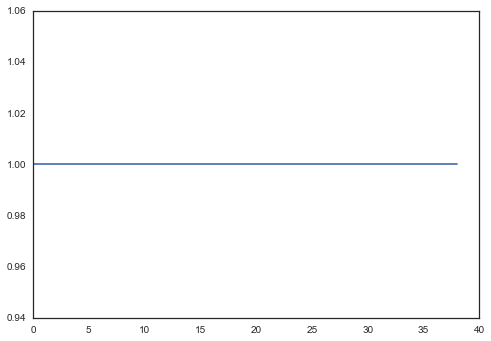

In [44]:
df_new = df_merged.drop(["FIPS","Cases", "d002", "hd02s051", "hd02s143", "hd02s159", "hd02s184", "hd01s001"], axis=1)
X = df_new.values

columns = X.shape[1]
for column in np.arange(columns):
    mean_temp = X[:,column].mean()
    std_temp = X[:,column].std()
    X[:,column] = (X[:,column]-mean_temp)/std_temp

plt.plot((np.std(X, axis=0)))

In [45]:
X.shape

(3060, 39)

In [46]:
pca = PCA(n_components=39)
pca.fit(X)
pca.explained_variance_ratio_

array([  2.94525564e-01,   1.64308375e-01,   7.98070500e-02,
         6.79178134e-02,   6.47768303e-02,   4.95135898e-02,
         4.30534407e-02,   3.07112910e-02,   2.94860465e-02,
         2.71764298e-02,   2.12387110e-02,   1.65600184e-02,
         1.57898743e-02,   1.35634732e-02,   1.22893006e-02,
         1.20671080e-02,   8.77515194e-03,   8.08329827e-03,
         6.89497673e-03,   5.86716605e-03,   4.85048055e-03,
         4.22251140e-03,   3.79732597e-03,   3.26146886e-03,
         2.58523806e-03,   2.24116473e-03,   1.79765723e-03,
         1.48926992e-03,   1.15747422e-03,   9.54360190e-04,
         3.18175827e-04,   2.56011170e-04,   1.86629727e-04,
         1.76638055e-04,   1.58593900e-04,   7.52418315e-05,
         4.39366076e-05,   1.35256555e-05,   8.78706740e-06])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


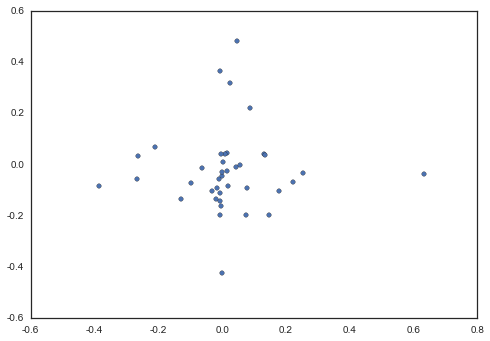

In [47]:
plt.scatter(pca.components_[:,0], pca.components_[:,1])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


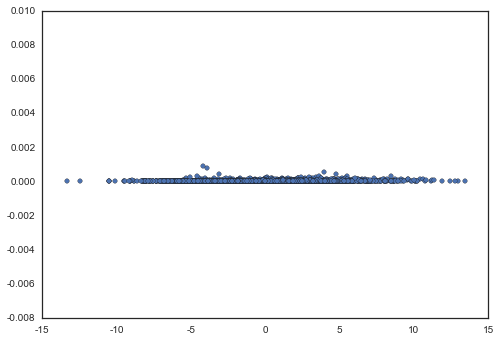

In [48]:
X_trans = pca.transform(X)
Y = df_merged["Cases"]/df_merged["Population"]
plt.scatter(X_trans[:,0],Y)

### Linear regression

In [49]:
from sklearn import linear_model

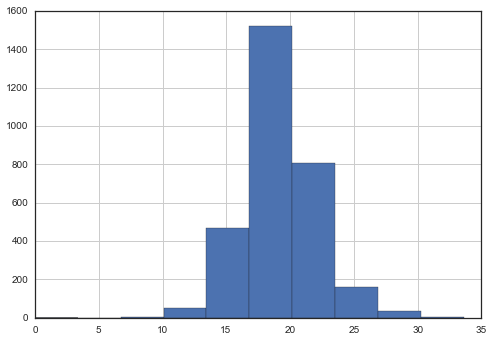

In [50]:
df_new["hd02s002"].hist()

In [51]:
df_new.head()

,Population,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s151,hd02s152,hd02s153,hd02s154,hd01s167,hd01s168,hd02s181,hd01vd01,d014,d019,d024,d029,lnd110210d
0,55246,21.8,7.9,5.6,5.8,6.1,7.6,7.5,15.0,10.7,12.0,37.0,48.7,78.5,17.7,0.4,0.9,0.1,1.6,2.4,99.2,37.1,20.8,31.8,23.6,6.1,74.5,34.9,56.2,25.3,2.68,3.13,75.4,52475,0.003017,0.020029,0.002868,0.017704,92.781808
1,195540,19.0,6.4,5.2,5.6,5.9,6.3,6.6,14.8,13.5,16.9,41.1,48.9,85.7,9.4,0.7,0.7,0.0,1.5,4.4,98.7,40.2,21.9,26.8,20.1,5.6,69.9,28.0,54.5,19.9,2.46,2.93,72.5,50183,0.002747,0.023886,0.003444,0.020292,122.920831
2,27076,18.0,6.3,6.5,7.3,6.6,6.6,6.6,14.7,13.2,14.3,39.0,53.1,48.0,46.9,0.4,0.4,0.1,0.9,5.1,88.4,35.8,15.6,25.7,17.7,7.8,68.4,27.4,43.7,14.4,2.47,3.01,66.8,35634,0.002342,0.019348,0.003666,0.022200,30.563959
3,22512,18.4,6.7,6.5,7.0,7.2,7.6,7.1,14.8,11.9,12.6,37.8,53.7,75.8,22.0,0.3,0.1,0.1,0.9,1.8,90.3,34.7,18.2,26.8,18.7,7.5,72.3,29.5,52.5,20.1,2.60,3.09,75.6,37984,0.001886,0.020244,0.002012,0.020370,36.101222
4,57872,20.2,7.0,5.4,6.0,6.0,6.8,7.0,14.1,12.6,14.6,39.0,49.5,92.6,1.3,0.5,0.2,0.1,1.2,8.1,99.1,37.6,22.8,29.2,21.3,6.4,75.0,31.1,60.6,24.1,2.63,3.07,80.6,44409,0.001946,0.017981,0.003707,0.013440,89.615659


In [52]:
df_merged.head()

,FIPS,Population,Cases,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
0,1001,55246,0,4.736962,21.8,7.9,5.6,5.8,6.1,7.6,7.5,15.0,10.7,12.0,37.0,48.7,51.3,78.5,17.7,0.4,0.9,0.1,1.6,2.4,99.2,37.1,20.8,31.8,23.6,6.1,0.8,74.5,34.9,56.2,25.3,25.5,2.68,3.13,75.4,24.6,52475,0.562138,0.003017,0.020029,0.002868,0.017704,92.781808
1,1003,195540,5,5.260703,19.0,6.4,5.2,5.6,5.9,6.3,6.6,14.8,13.5,16.9,41.1,48.9,51.1,85.7,9.4,0.7,0.7,0.0,1.5,4.4,98.7,40.2,21.9,26.8,20.1,5.6,1.3,69.9,28.0,54.5,19.9,30.1,2.46,2.93,72.5,27.5,50183,0.545409,0.002747,0.023886,0.003444,0.020292,122.920831
2,1005,27076,1,4.438653,18.0,6.3,6.5,7.3,6.6,6.6,6.6,14.7,13.2,14.3,39.0,53.1,46.9,48.0,46.9,0.4,0.4,0.1,0.9,5.1,88.4,35.8,15.6,25.7,17.7,7.8,11.6,68.4,27.4,43.7,14.4,31.6,2.47,3.01,66.8,33.2,35634,0.437169,0.002342,0.019348,0.003666,0.022200,30.563959
3,1007,22512,0,4.360120,18.4,6.7,6.5,7.0,7.2,7.6,7.1,14.8,11.9,12.6,37.8,53.7,46.3,75.8,22.0,0.3,0.1,0.1,0.9,1.8,90.3,34.7,18.2,26.8,18.7,7.5,9.7,72.3,29.5,52.5,20.1,27.7,2.60,3.09,75.6,24.4,37984,0.524582,0.001886,0.020244,0.002012,0.020370,36.101222
4,1009,57872,0,4.758321,20.2,7.0,5.4,6.0,6.0,6.8,7.0,14.1,12.6,14.6,39.0,49.5,50.5,92.6,1.3,0.5,0.2,0.1,1.2,8.1,99.1,37.6,22.8,29.2,21.3,6.4,0.9,75.0,31.1,60.6,24.1,25.0,2.63,3.07,80.6,19.4,44409,0.606034,0.001946,0.017981,0.003707,0.013440,89.615659


Split data set into training/test and validation data

In [53]:
cutoff = 0

X_full = df_new.values
Y_full = df_merged.Cases/(df_merged.Population+1.0)

Ymean = Y_full.mean()
Ystd = Y_full.std()

Y_full = (Y_full-Ymean)/Ystd

X = df_new[df_merged["Cases"]>cutoff].values
Y = df_merged[df_merged["Cases"]>cutoff].Cases/(df_merged[df_merged["Cases"]>cutoff].Population+1.0)


#normalize all columns to the same normalization
columns = X.shape[1]
means = np.zeros(columns)
stds = np.zeros(columns)
for column in np.arange(columns):
    mean_temp = X[:,column].mean()
    std_temp = X[:,column].std()
    means[column] = mean_temp
    stds[column] = std_temp
    X[:,column] = (X[:,column]-mean_temp)/std_temp
    X_full[:,column] = (X_full[:,column]-mean_temp)/std_temp


Y = (Y-Ymean)/Ystd
    
ones = np.ones(round(0.75*len(X)), dtype=bool)
zeros = np.zeros(len(X)-round(0.75*len(X)), dtype=bool)
training_list = np.hstack((ones, zeros))
np.random.shuffle(training_list)
test_list = np.zeros(len(X),dtype=bool)
test_list = np.array([not i for i in training_list])

X_train = X[training_list]
X_test = X[test_list]
Y_train = Y[training_list]
Y_test = Y[test_list]

X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape

((1158, 39), (868, 39), (290, 39), (1158,), (868,), (290,))

In [54]:
X.shape, Y.shape

((1158, 39), (1158,))

In [55]:
Y_test.describe()

count    290.000000
mean       0.745235
std        1.506295
min       -0.370214
25%       -0.006851
50%        0.354377
75%        1.002525
max       19.722574
dtype: float64

In [56]:
#X_weights = df_merged.values
#X_train_weights = X_weights[training_list]
weights = 1 #X_train_weights[:,2]
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train, sample_weight=weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
print(regr.coef_)

[-0.0270105   1.95080825  0.793215    0.91796778  0.67006371  0.43010947
  0.3145839  -0.07460759  0.99871779  0.16974484  1.14129315  1.03149265
 -0.00590878  0.22634993  0.98192914  0.10622331  0.25920408 -0.11582079
 -0.01292416  0.17348556  0.2937162  -0.20014809  0.57799902 -1.15685882
 -0.40689224 -0.35578498  0.21758115 -0.35645244 -0.32116973  0.49583108
 -0.92040164  1.51474635 -0.20088905 -0.40040487  0.36506137  0.3698203
 -0.0473237  -0.27697099  0.03163589]


In [58]:
1.0-np.sum((regr.predict(X_test)-Y_test)**2)/np.sum((Y_test-np.mean(Y_test))**2)

0.15649575060116205

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


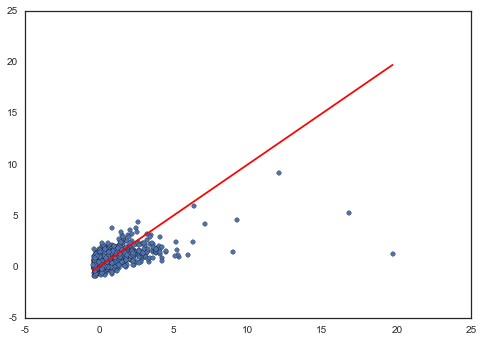

In [59]:
plt.scatter(Y,regr.predict(X))
plt.plot(np.linspace(Y.min(),Y.max(),num=10),np.linspace(Y.min(),Y.max(),num=10),color='red')

In [60]:
print('Variance score: %.5f\t(%.5f)' % (regr.score(X_test, Y_test), regr.score(X_full, Y_full)))

Variance score: 0.15650	(-1.30698)


In [61]:
from sklearn import cross_validation
cv = cross_validation.ShuffleSplit(len(Y_train), n_iter=5, test_size=0.2, random_state=0)
scores_regression = cross_validation.cross_val_score(regr, X_train, Y_train, cv=cv)
scores_regression
#cross_val_score(regr, X_train, Y_train, cv=6, n_jobs=1)
#scores

array([ 0.20368175,  0.34359438,  0.08510964,  0.4037853 ,  0.21052726])

In [62]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_regression.mean(), scores_regression.std() * 2))

Accuracy: 0.25 (+/- 0.23)


In [63]:
from sklearn.metrics import explained_variance_score

In [64]:
explained_variance_score(Y_train, regr.predict(X_train))

0.40932529408002527

In [65]:
from sklearn.metrics import mean_absolute_error

In [66]:
mean_absolute_error(Y_train, regr.predict(X_train))

0.63517597664191394

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(Y_train, regr.predict(X_train))

0.96401191205528081

In [69]:
from sklearn.metrics import median_absolute_error

In [70]:
median_absolute_error(Y_train, regr.predict(X_train))

0.45641567891694668

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(Y_train, regr.predict(X_train))

0.40932529408002527

## Polynomial regression

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly = PolynomialFeatures(degree=2)

In [75]:
X_train_poly = poly.fit_transform(X_train)

In [76]:
poly_regr = linear_model.LinearRegression(fit_intercept=False)
poly_regr.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


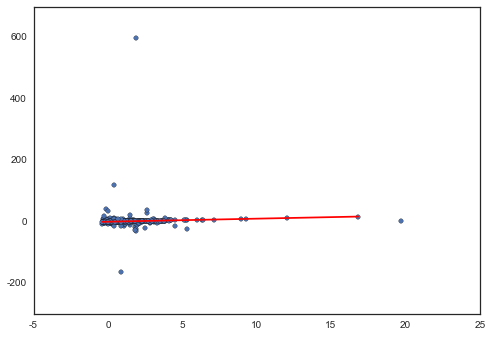

In [77]:
plt.scatter(Y,poly_regr.predict(poly.fit_transform(X)))
plt.plot(np.linspace(Y_train.min(),Y_train.max(),num=10),np.linspace(Y_train.min(),Y_train.max(),num=10),color='red')

In [78]:
print('Variance score: %.5f\t(%.5f)' % (poly_regr.score(poly.fit_transform(X_test), Y_test), poly_regr.score(poly.fit_transform(X), Y)))

Variance score: -629.46522	(-198.48403)


## Ridge regression

In [79]:
from sklearn import linear_model

In [80]:
rregr = linear_model.Ridge(alpha=0.5)
rregr.fit(X_train, Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
print('Variance score: %.5f\t(%.5f)' % (rregr.score(X_test, Y_test), rregr.score(X_full, Y_full)))

Variance score: 0.16085	(-1.26737)


In [82]:
scores_rregression = cross_validation.cross_val_score(rregr, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rregression.mean(), scores_rregression.std() * 2))

Accuracy: 0.27 (+/- 0.23)


## Extra Trees Regression

In [83]:
from sklearn.ensemble import ExtraTreesRegressor

In [84]:
clf = ExtraTreesRegressor(n_estimators=250, bootstrap=True, oob_score=True, max_features='sqrt')
clf.fit(X_train, Y_train)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=250, n_jobs=1, oob_score=True, random_state=None,
          verbose=0, warm_start=False)

In [85]:
print('Variance score: %.5f\t(%.5f)\nOut of bag error score: %.5f' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full),clf.oob_score_))

Variance score: 0.24765	(-1.02458)
Out of bag error score: 0.31542


In [86]:
scores_etregression = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_etregression.mean(), scores_etregression.std() * 2))

Accuracy: 0.32 (+/- 0.10)


## Ada Boost Regressor

In [87]:
from sklearn.ensemble import AdaBoostRegressor

In [88]:
clf = AdaBoostRegressor(n_estimators=500, learning_rate=0.01, loss='linear')
clf.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=500, random_state=None)

In [89]:
print('Variance score: %.5f\t(%.5f)' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full)))

Variance score: 0.21589	(-6.43756)


In [90]:
scores_adaregression = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_adaregression.mean(), scores_adaregression.std() * 2))

Accuracy: 0.33 (+/- 0.10)


## Bagging regressor

In [91]:
from sklearn.ensemble import BaggingRegressor

In [92]:
clf = BaggingRegressor(n_estimators=250, bootstrap=True, oob_score=True, max_features=20)
clf.fit(X_train, Y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=20, max_samples=1.0,
         n_estimators=250, n_jobs=1, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [93]:
print('Variance score: %.5f\t(%.5f)\nOut of bag error score: %.5f' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full),clf.oob_score_))

Variance score: 0.34419	(-5.68550)
Out of bag error score: 0.41698


In [94]:
scores_bagregression = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_bagregression.mean(), scores_bagregression.std() * 2))

Accuracy: 0.42 (+/- 0.12)


## Gradient Boosting Regressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
clf = GradientBoostingRegressor(n_estimators=250, max_features=10,max_depth=5)
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=5, max_features=10, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [97]:
print('Variance score: %.5f\t(%.5f)' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full)))

Variance score: 0.34133	(-6.88770)


/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


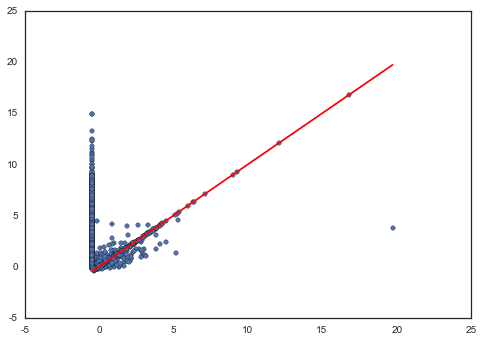

In [98]:
plt.scatter(Y_full,clf.predict(X_full))
plt.plot(np.linspace(Y_full.min(),Y_full.max(),num=10),np.linspace(Y_full.min(),Y_full.max(),num=10),color='red')

In [99]:
scores_gradboostregression = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gradboostregression.mean(), scores_gradboostregression.std() * 2))

Accuracy: 0.38 (+/- 0.18)


In [100]:
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=5, max_features=10, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [101]:
import pickle

In [102]:
with open("../data/gradientboosting_params_syphilis.pickle", "wb") as myfile:
    pickle.dump(clf, myfile)

## Random forest

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
clf = RandomForestRegressor(n_estimators=250, oob_score=True, max_features='sqrt',min_samples_split=2, n_jobs=4)
clf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=250, n_jobs=4, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [105]:
print('Variance score: %.5f\t(%.5f)\nOut of bag error score: %.5f' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full),clf.oob_score_))

Variance score: 0.31602	(-3.86741)
Out of bag error score: 0.36314


In [106]:
scores_randomforest = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_randomforest.mean(), scores_randomforest.std() * 2))

Accuracy: 0.41 (+/- 0.12)


In [107]:
clf = RandomForestRegressor(n_estimators=250, oob_score=True, max_features='sqrt',min_samples_split=2, n_jobs=4)

clf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=250, n_jobs=4, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


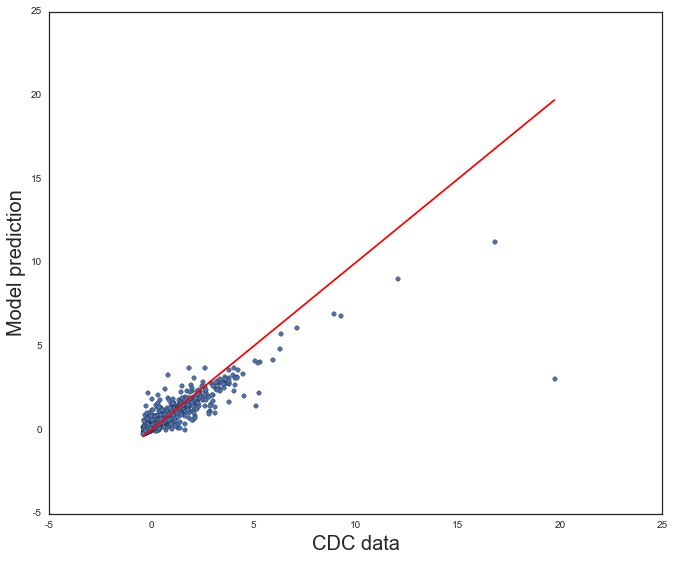

In [108]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#ax.text(-1.5, 3, r'$R^2 = $%.2f'%(clf.oob_score_), fontsize=30)


ax.set_xlabel("CDC data", fontsize=20)
ax.set_ylabel("Model prediction", fontsize=20)

ax = plt.scatter(Y,clf.predict(X))
ax2 = plt.plot(np.linspace(Y.min(),Y.max(),10),np.linspace(Y.min(),Y.max(),10),color='red')

plt.savefig('../graphics/data_vs_model_syphilis.png', bbox_inches='tight', dpi=150)

/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


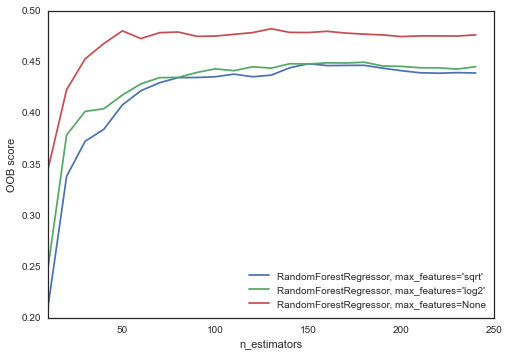

In [803]:
from collections import OrderedDict
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(warm_start=False, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(warm_start=False, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(warm_start=False, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 250

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators,10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, Y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB score")
plt.legend(loc="lower right")

plt.savefig('../graphics/features_estimators_syphilis.png', bbox_inches='tight', dpi=150)

In [804]:
feature_importance = (np.vstack((np.arange(len(clf.feature_importances_)), clf.feature_importances_)).T)
ranking = feature_importance[feature_importance[:,1].argsort()[::-1]]

In [805]:
for rank, importance in ranking: 
    print(df_new.columns[rank], importance)

Population 0.195986846062
hd01s001 0.165392121646
hd02s078 0.12471663561
d014 0.0607630672128
d002 0.0345346216777
d019 0.0305538972691
hd02s153 0.025311600788
hd02s133 0.0251932230657
hd02s079 0.0224267462224
d029 0.0182270529763
hd02s010 0.0175445458227
hd02s007 0.016782140179
d024 0.0151855648049
lnd110210d 0.0141870153791
hd02s009 0.0125378770732
hd02s136 0.011846033965
hd02s107 0.0112072812236
hd01s020 0.0105896722905
hd02s159 0.0104220859587
hd02s154 0.0100913293708
hd02s015 0.0100068787359
hd02s151 0.00927298168837
hd02s152 0.0090521545721
hd02s095 0.00846367083241
hd02s008 0.00837775983872
hd02s181 0.00780187299606
hd02s051 0.00774365030639
hd02s184 0.0077161981323
hd01vd01 0.00706506525411
hd02s013 0.0070509898036
hd02s006 0.00704980861984
hd02s081 0.00700369567347
hd02s011 0.00688217118523
hd02s143 0.00679529288095
hd02s026 0.00650799619435
hd02s080 0.00612151315217
hd02s002 0.00601909115724
hd02s132 0.00557293552497
hd02s005 0.00541279296441
hd02s131 0.00539662414078
hd02s13

In [806]:
labels_dict = {
    "Population": "Population",
    "hd01s001":  "log10(Population)",
    "hd02s002":  "0-14",
    "hd02s005":  "15-19",
    "hd02s006":  "20-24",
    "hd02s007":  "25-29",
    "hd02s008":  "30-34",
    "hd02s009":  "35-39",
    "hd02s010":  "40-44",
    "hd02s011":  "45-54",
    "hd02s013":  "55-64",
    "hd02s015":  "65+",
    "hd01s020":  "Median age",
    "hd02s026":  "Male percent",
    "hd02s051":  "Female percent",
    "hd02s078":  "White",
    "hd02s079":  "Black",
    "hd02s080":  "Native",
    "hd02s081":  "Asian",
    "hd02s089":  "Pacific/Hawaiian",
    "hd02s095":  "Two or more races",
    "hd02s107":  "Hispanic",
    "hd02s131":  "In households",
    "hd02s132":  "Householder",
    "hd02s133":  "Spouse",
    "hd02s134":  "Child",
    "hd02s135":  "Child w own child under 18",
    "hd02s136":  "Other relatives",
    "hd02s143":  "In group quarters",
    "hd02s151":  "Family households",
    "hd02s152":  "Family households w own child under 18",
    "hd02s153":  "Husband-wife family",
    "hd02s154":  "Husband-wife family w own child under 18",
    "hd02s159":  "Nonfamily households",
    "hd01s167":  "Average household size",
    "hd01s168":  "Average family size",
    "hd02s181":  "Owner occupied housing units",
    "hd02s184":  "Renter occupied housing units",
    "hd01vd01":  "Median income",
    "d001":      "Total households",
    "d002":      "Husband-wife households",
    "d014":      "Unmarried-partner households: - Male householder and male partner",
    "d019":      "Unmarried-partner households: - Male householder and female partner",
    "d024":      "Unmarried-partner households: - Female householder and female partner",
    "d029":      "Unmarried-partner households: - Female householder and male partner",
    "lnd110210d": "Population density"}

In [807]:
ranked_list = []
ranked_labels = []
for rank, importance in ranking: 
    print(labels_dict[df_new.columns[rank]], importance)
    ranked_list.append(importance)
    ranked_labels.append(labels_dict[df_new.columns[rank]])

Population 0.195986846062
log10(Population) 0.165392121646
White 0.12471663561
Unmarried-partner households: - Male householder and male partner 0.0607630672128
Husband-wife households 0.0345346216777
Unmarried-partner households: - Male householder and female partner 0.0305538972691
Husband-wife family 0.025311600788
Spouse 0.0251932230657
Black 0.0224267462224
Unmarried-partner households: - Female householder and male partner 0.0182270529763
40-44 0.0175445458227
25-29 0.016782140179
Unmarried-partner households: - Female householder and female partner 0.0151855648049
Population density 0.0141870153791
35-39 0.0125378770732
Other relatives 0.011846033965
Hispanic 0.0112072812236
Median age 0.0105896722905
Nonfamily households 0.0104220859587
Husband-wife family w own child under 18 0.0100913293708
65+ 0.0100068787359
Family households 0.00927298168837
Family households w own child under 18 0.0090521545721
Two or more races 0.00846367083241
30-34 0.00837775983872
Owner occupied housi

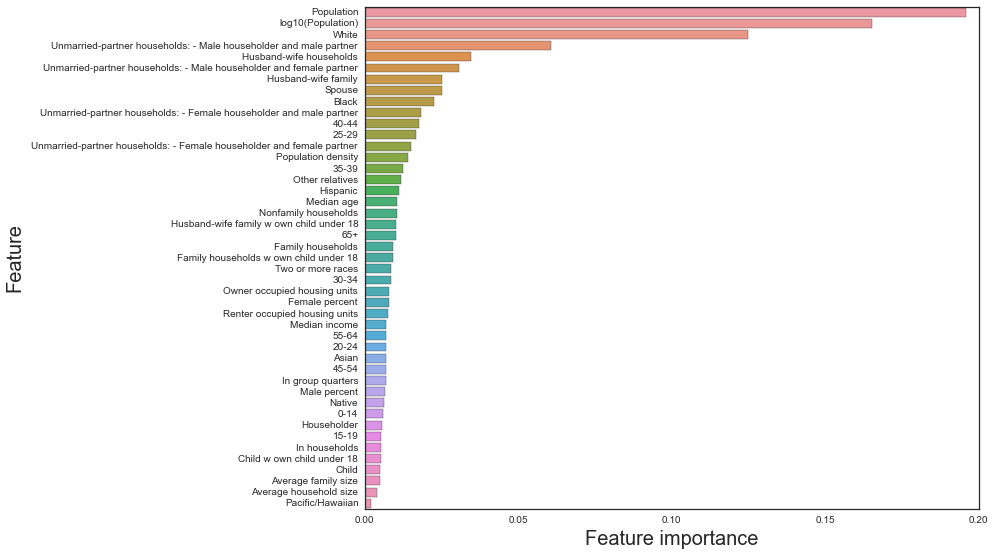

In [808]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

ax.set_xlabel("Feature importance", fontsize=20)
ax.set_ylabel("Feature", fontsize=20)

ax = sns.barplot(x=ranked_list, y=ranked_labels)
plt.savefig('../graphics/feature_importance_ranking_syphilis.png', bbox_inches='tight', dpi=150)

In [809]:
len(ranked_list)

45

Save model parameters for use in web app:

In [109]:
import pickle

In [110]:
with open("../data/randomforest_params_syphilis.pickle", "wb") as myfile:
    pickle.dump(clf, myfile)

In [111]:
with open("../data/Ymean_syphilis.pickle", "wb") as myfile:
    pickle.dump(Ymean, myfile)

In [112]:
with open("../data/Ystd_syphilis.pickle", "wb") as myfile:
    pickle.dump(Ystd, myfile)

In [113]:
deployed_model = pickle.load(open('../data/randomforest_params_syphilis.pickle', "rb" ))

In [114]:
print('Variance score: %.5f\t(%.5f)' % (deployed_model.score(X_test, Y_test), deployed_model.score(X_full, Y_full)))

Variance score: 0.32411	(-3.79570)


## Suport Vector Regression

In [816]:
from sklearn.svm import SVR

In [817]:
svr_rbf = SVR(kernel='rbf', C=15, gamma=0.0001, epsilon=0.0005, tol=0.00001)
#svr_lin = SVR(kernel='linear', C=1, epsilon=0.001)
#svr_poly = SVR(kernel='poly', C=1, degree=2, epsilon=0.001)
svr_rbf.fit(X_train, Y_train)
#svr_lin.fit(X_train, Y_train)
#svr_poly.fit(X_train, Y_train)
#print('Variance score:\n\t%.5f\t(rbf)\n\t%.5f\t(lin)\n\t%.5f\t(poly)' % (svr_rbf.score(X_train, Y_train), svr_lin.score(X_train, Y_train),svr_poly.score(X_train, Y_train)))
print('Variance score:\n\t%.5f\t(rbf)' % (svr_rbf.score(X_test, Y_test)))

Variance score:
	0.16262	(rbf)


In [818]:
scores_svm = cross_validation.cross_val_score(svr_rbf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

Accuracy: 0.18 (+/- 0.15)


## Model comparison

In [819]:
model_scores = []
model_errors = []
model_names = []
model_scores.append(np.mean(scores_regression))
model_errors.append(np.std(scores_regression)*2)
model_names.append("Linear")
model_scores.append(np.mean(scores_rregression))
model_errors.append(np.std(scores_rregression)*2)
model_names.append("Ridge")
model_scores.append(np.mean(scores_etregression))
model_errors.append(np.std(scores_etregression)*2)
model_names.append("Extra trees")
model_scores.append(np.mean(scores_adaregression))
model_errors.append(np.std(scores_adaregression)*2)
model_names.append("ADA boost")
model_scores.append(np.mean(scores_bagregression))
model_errors.append(np.std(scores_bagregression)*2)
model_names.append("Bagging")
model_scores.append(np.mean(scores_gradboostregression))
model_errors.append(np.std(scores_gradboostregression)*2)
model_names.append("Gradient boost")
model_scores.append(np.mean(scores_svm))
model_errors.append(np.std(scores_svm)*2)
model_names.append("Suport vector")
model_scores.append(np.mean(scores_randomforest))
model_errors.append(np.std(scores_randomforest)*2)
model_names.append("Random forest")

In [820]:
model_names, model_scores, model_errors

(['Linear',
  'Ridge',
  'Extra trees',
  'ADA boost',
  'Bagging',
  'Gradient boost',
  'Suport vector',
  'Random forest'],
 [0.16810326473389006,
  0.18817861664260879,
  0.37187035836492166,
  0.35620082542844822,
  0.45360441899793658,
  0.43670378987454911,
  0.18082470787157584,
  0.43050608024937953],
 [0.13711032988820399,
  0.13288748752238103,
  0.16325775657769012,
  0.16955498405614058,
  0.09798852598172561,
  0.10812839001790477,
  0.14651252895480721,
  0.12656458372274265])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


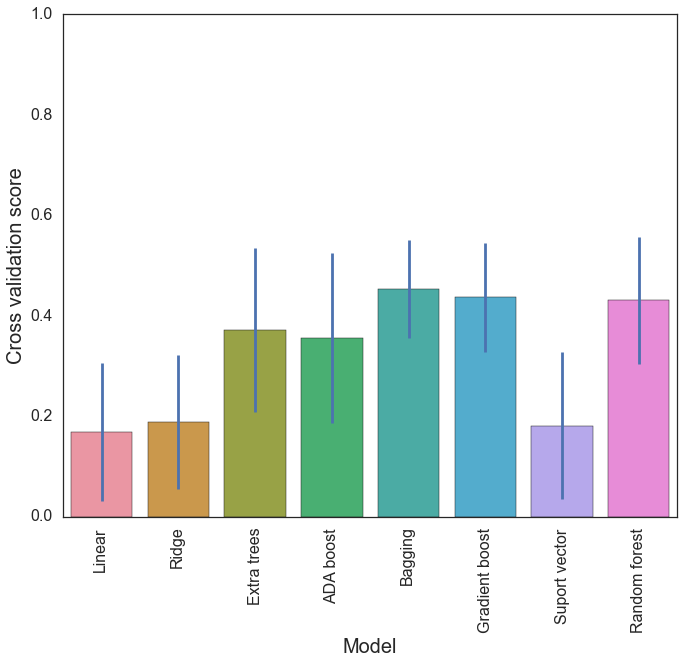

In [821]:
# Set up the matplotlib figure
sns.set_context("poster", font_scale=1)
f, ax = plt.subplots(figsize=(11, 9))

ax.set_xlabel("Model", fontsize=20)
ax.set_ylabel("Cross validation score", fontsize=20)

plt.ylim([0,1])
ax = sns.barplot(x=model_names, y=model_scores, yerr=model_errors)
plt.xticks(rotation=90)
plt.savefig('../graphics/model_performance_syphilis.png', bbox_inches='tight', dpi=150)